# Topic Modelling

### What is Topic Modelling

Topic modeling is a type of statistical model used to discover abstract topics that occur in a collection of documents. It is an unsupervised machine learning technique that identifies patterns in the distribution of words across a large set of texts, allowing the model to automatically cluster the texts into topics. Each topic is represented as a mixture of words, and each document can be viewed as a mixture of these topics.

### How Does Topic Modeling Work?
The most commonly used algorithms for topic modeling are:
- Latent Dirichlet Allocation (LDA): LDA assumes that documents are generated from a mixture of topics, where each topic is a distribution over words. It tries to reverse this process to determine the set of topics that likely created the given collection of documents. <br> <br>
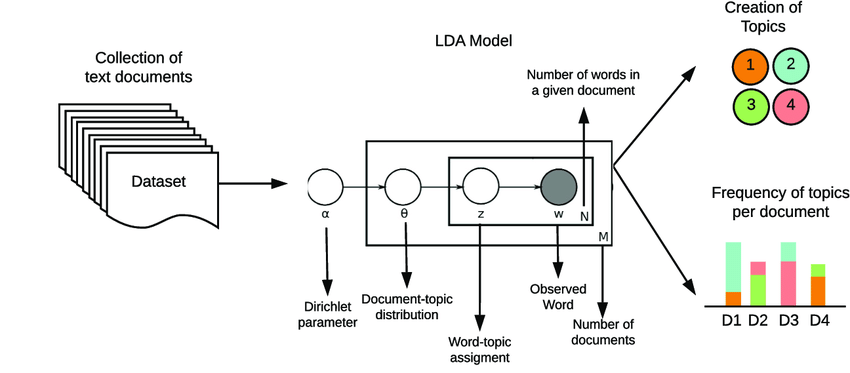


- Non-Negative Matrix Factorization (NMF): NMF factorizes the document-term matrix into two lower-dimensional matrices, revealing the latent topics in the documents and the words that are most representative of those topics.


In [17]:
import gensim
import nltk
import gensim.corpora as corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
import re
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')
# nltk.download('stopwords')
# !python -m spacy download en_core_web_sm

# for visualizing
# !pip install pyLDAvis

In [27]:
# defining the corpus
documents = [
    "The animated series captivated audiences with its vibrant characters and humorous storylines.",
    "Cartoon Network's iconic shows from the 90s remain beloved by fans of all ages.",
    "The art of animation has evolved significantly, blending traditional techniques with digital technology.",
    "Saturday morning cartoons were a staple of childhood entertainment for many generations.",
    "The latest cartoon movie features a heartwarming tale of friendship and adventure.",
    "The impact of World War II was felt across the globe, altering the course of history.",
    "Soldiers in the trenches faced unimaginable hardships during the war.",
    "The strategies used in modern warfare have evolved with advancements in military technology.",
    "War has profound effects on both the soldiers who fight and the civilians caught in the crossfire.",
    "The Cold War era was marked by political tension and the threat of nuclear conflict.",
    ]

In [28]:
nlp = spacy.load('en_core_web_sm')

In [29]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

processed_docs = [preprocess(doc) for doc in documents]

In [30]:
id2words = corpora.Dictionary(processed_docs)
corpus = [id2words.doc2bow(text) for text in processed_docs]
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(11, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(11, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)], [(40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)], [(50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)], [(21, 1), (24, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(48, 1), (52, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(48, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1)]]


In [31]:
# building the model
lda_model = LdaModel(
    corpus = corpus,
    id2word=id2words,
    num_topics=2,
    random_state=42,
    update_every=1,
    chunksize=10,
    passes=10,
    alpha='auto',
    )

topics = lda_model.print_topics()
for topic in topics:
    display(topic)

(0,
 '0.043*"war" + 0.019*"cartoon" + 0.019*"altering" + 0.019*"across" + 0.019*"humorous" + 0.019*"history." + 0.019*"impact" + 0.019*"globe," + 0.019*"felt" + 0.019*"animated"')

(1,
 '0.032*"cartoon" + 0.032*"evolved" + 0.032*"technology." + 0.019*"soldier" + 0.019*"digital" + 0.019*"trench" + 0.019*"technique" + 0.019*"animation" + 0.019*"significantly," + 0.019*"blending"')

In [32]:
# Visualization

lda_vis = gensimvis.prepare(lda_model, corpus, id2words)
pyLDAvis.display(lda_vis)